In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

%matplotlib inline

#change to nicer default style
plt.style.use('seaborn')

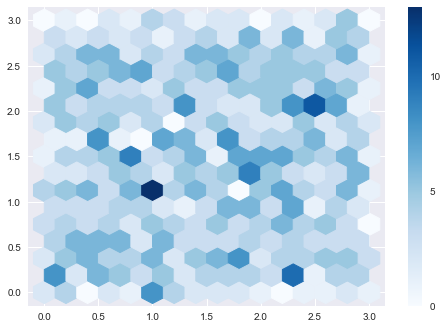

In [26]:
x = range(10)
label = np.random.randint(0, 2, size=10)
y1 = np.random.uniform(0,10, size=10)
y2 = np.random.uniform(2,10, size=10)
y3 = np.random.uniform(3,10, size=10)
y4 = np.random.uniform(0,3, size=10)

y_ndist1 = np.random.randn(500)
y_ndist2 = np.random.randn(500)*1.5 + 10

y_2d = np.random.randn(10,10)

x_many = np.random.uniform(0,3, size=1000)
label_many = np.random.randint(0, 2, size=1000)
y_many = np.random.uniform(0,3, size=1000)


def plot_line():
    plt.plot(x, y1, label='line', marker='o')

def plot_scatter():
    plt.scatter(x, y1, label='scatter', c='r', marker='o')
    
def plot_scatter_with_label():    
    color = ['b' if lab == 1 else 'r' for lab in label_many]
    
    scatter = plt.scatter(x_many, y_many, c=color, marker='o')
    
    #adding legend by using empty scatter plots
    classes = ['0', '1']
    class_colours = ['r','b']
    for idx in range(len(classes)):
        plt.scatter([],[], label=classes[idx], c=class_colours[idx], marker='o')
    plt.legend(frameon=True).get_frame().set_linewidth(3)
    
def plot_hexbin():
    #better way to visualize dense scatterplots
    im = plt.hexbin(x_many, y_many, gridsize=15, bins=None, cmap=plt.cm.Blues)
    cbar = plt.colorbar(im, ticks=[0,5,10], orientation='vertical')    

def plot_bar():
    plt.bar(x, y1)
    
def plot_barh():
    #horizontal bar chart
    plt.barh(x, y1)

def plot_stackplot():
    #stack plots on each other (adding up)
    plt.plot([], [], label='y1', color='r')
    plt.plot([], [], label='y2', color='g')
    plt.plot([], [], label='y3', color='b')
    plt.stackplot(x, y1, y2, y3, colors=['r','g','b'])
    plt.legend()

def plot_fill_between_graphs():
    #fill in the area between 2 line graphs
    plt.plot(x,y3,lw=3,c='r')
    plt.plot(x,y4,lw=3,c='g')
    plt.fill_between(x, y3, y4)

def plot_histogram():
    plt.hist(y_ndist1, bins=30)
    
def plot_boxplot():
    # plt.boxplot(y_ndist1, labels=['num1']) #for single boxplot
    
    #2 groups of 2 boxplots
    #group 1
    bp = plt.boxplot([y_ndist1,y_ndist1], labels=['num1','num2'], patch_artist=True) #these labels will be overwritten by the labels below
    
    for key in bp.keys():
        plt.setp(bp[key], color='red')
    for patch in bp['boxes']:
        patch.set(facecolor='orange')
        
    #group 2
    bp = plt.boxplot([y_ndist2,y_ndist2], labels=['num3','num4'], patch_artist=True)
    
    for key in bp.keys():
        plt.setp(bp[key], color='black')
    for patch in bp['boxes']:
        patch.set(facecolor='gray')
    
    
def plot_violinplot():
    #similar to boxplot, but shows distribution of values
    plt.violinplot(y_ndist1)

def plot_heatmap():
    im = plt.pcolormesh(y_2d, cmap=plt.cm.Blues)
    cbar = plt.colorbar(im, ticks=[-1,0,1], orientation='vertical')
    cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])

def plot_contourf():
    #filled contour plot
    plt.contourf(y_2d)

def save_plot():
    plt.savefig("foo.png", transparent=True)
    
def other_options():
    #basics
    plt.title('Chart title')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    #set x-limit on graph
    plt.xlim(0,8)
    #plot horizontal line
    plt.axhline(y=0.5)
    #plot vertical line
    plt.axvline(x=0.5)

plot_hexbin()

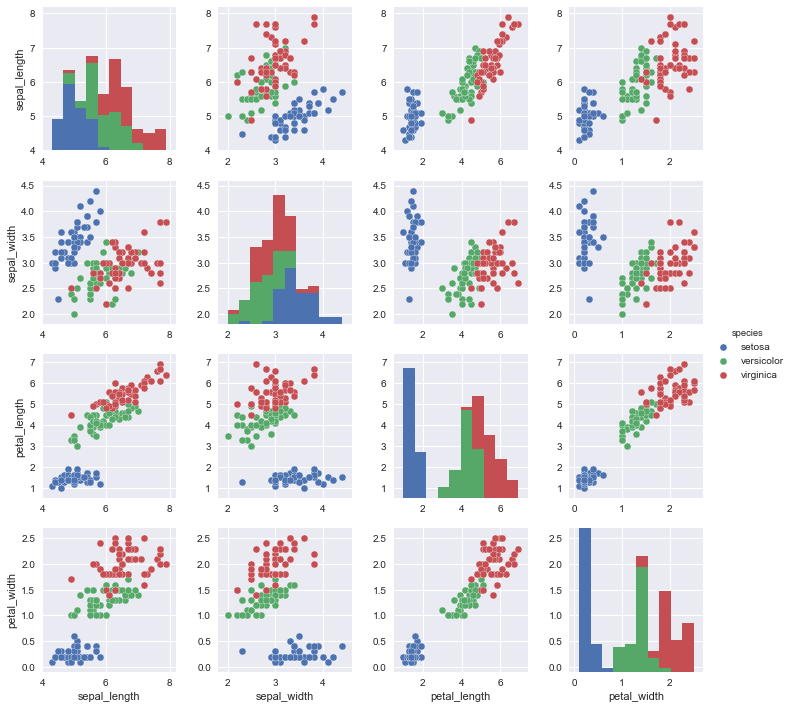

In [18]:
#scatterplot matrix
import seaborn as sns

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

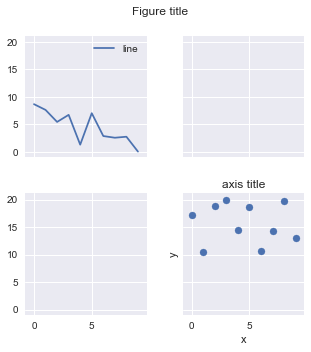

In [22]:
#subplots
x = range(10)
y1 = np.random.uniform(0,10, size=10)
y2 = np.random.uniform(10,20, size=10)

#2 ways of initializing subplots
def subplot_method1():
    #init figure
    fig = plt.figure(figsize=(5,5))
    #this figure will have several subplots/axes
    ax_1 = fig.add_subplot(2, 2, 1) #num_rows, num_cols, chart number
    ax_1.plot(x, y1, label='line')
    ax_1.legend()

    ax_2 = fig.add_subplot(2, 2, 4, sharey=ax_1) #share y axis
    ax_2.scatter(x, y2)
    
def subplot_method2():
    #init_figure
    fig = plt.figure()
    #this figure will have several subplots/axes
    fig, axes = plt.subplots(2,2, figsize=(5,5), sharex=True, sharey=True) #axes will be size (2,2) tuple, where 2,2 is num_rows, num_cols. In this case, all axes will share x and y axis
    axes[0][0].plot(x, y1, label='line')
    axes[0][0].legend()
    
    axes[1][1].scatter(x, y2)
    
    #set subplot options
    fig.suptitle('Figure title')
    axes[1][1].set(title='axis title', xlabel='x', ylabel='y')
    plt.subplots_adjust(wspace=0.3, hspace=0.3, top=0.9) #adjust spacing between subplots, to allow space for labels and titles
    #plt.tight_layout() #auto adjust the spacing, but doesn't always work well
    
subplot_method2()